<a href="https://colab.research.google.com/github/danhively/CS4499/blob/main/HW3_Hively.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
Due: 2/13/23 Worth 100 pts 
Dan Hively

First use one of the techniques we used in class to import the United_States_COVID-19_Community_Levels_by_County dataset. (The dataset is under the assignment item in moodle). 

In [2]:
# Import packages 
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Make sure we can get to the notebook and data file.
# Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir("/content/drive/My Drive/CS4499")
!ls -al

Mounted at /content/drive/
total 12391
-rw------- 1 root root     4812 Jan 15 05:19 HW1_Hively.ipynb
-rw------- 1 root root    25552 Jan 30 21:46 HW2_Hively.ipynb
-rw------- 1 root root    94437 Feb  9 23:28 HW3_Hively.ipynb
-rw------- 1 root root 12561569 Feb  7 00:11 United_States_COVID-19_Community_Levels_by_County.csv
-rw------- 1 root root      172 Feb  8 20:58 United_States_COVID-19_Community_Levels_by_County.gsheet


In [3]:
# Bring in the data 
us_covid_df = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')

In [4]:
# What does the data look like?
us_covid_df.describe() 

,county_fips,county_population,health_service_area_number,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k
count,112836.00000,1.128350e+05,112836.000000,1.128290e+05,112648.00000,112778.000000,112836.000000
mean,31438.02789,1.029200e+05,400.462033,5.808604e+05,3.25508,7.716028,144.930991
std,16331.50567,3.293638e+05,243.444960,9.952625e+05,2.66225,6.788769,186.263383
min,1001.00000,8.600000e+01,1.000000,2.274000e+03,0.00000,0.000000,0.000000
25%,19033.00000,1.113100e+04,186.000000,9.021200e+04,1.30000,3.000000,44.817500
50%,30027.00000,2.611800e+04,409.000000,2.249140e+05,2.80000,6.500000,106.760000
75%,46111.00000,6.721500e+04,587.000000,5.545570e+05,4.50000,10.700000,194.200000
max,78000.00000,1.003911e+07,905.000000,1.321480e+07,36.00000,171.200000,13017.750000


**Question 1**<br/>
How many samples (i.e. data points) are in this dataset?

In [5]:
sample_num = len(us_covid_df)
print("How many samples: " + str(sample_num))
#us_covid_df.info

How many samples: 112836


**Question 2** <br/>
What is the average population of all the counties in this dataset? 



In [6]:
# Check if there are any NANs in the data.
#count_nan = us_covid_df['county_population'].isnull().sum()
#print('Number of NaN values present: ' + str(count_nan))

# Drop entries in row that have NAN values.
#us_covid_df = us_covid_df.dropna()
#print(us_covid_df)
#county_pop  = us_covid_df['county_population'].values
#b = np.sum(county_pop)
#b
#print(str(county_pop))

b = us_covid_df['county_population'].mean()
print("Average Population: " + str(b))

Average Population: 102919.9695395932


**Question 3**
Create a histogram of the **Health Service Population** using 100 bins. Make sure to add a title to your plot. 

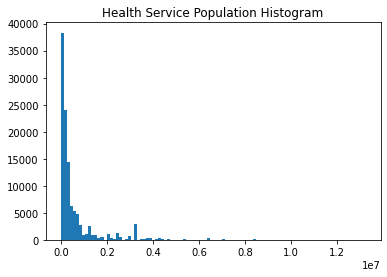

In [7]:
# Plot a histogram of the Health Service Population with 100 bins
plt.hist(us_covid_df['health_service_area_population'], bins=100)

# Add a title to the plot
plt.title("Health Service Population Histogram")

# Display the plot
plt.show()

**Question 4** <br/>
Using Python code, how many of the counties have a County Population greater than 100,000

**Question 5**<br/>
Of the counties sampled, what is the highest **Healtth Service Area Population**?

In [8]:
# Count the number of counties where population is greater than 100,000
count = us_covid_df[us_covid_df['county_population'] > 100000].shape[0]

print("Number of counties with population greater than 100,000: ", count)

Number of counties with population greater than 100,000:  21207


In [9]:
# Find the maximum value of the Health Service Area Population
max_population = us_covid_df['health_service_area_population'].max()

print("The highest Health Service Area Population is: ", max_population)

The highest Health Service Area Population is:  13214799.0


**Question 6** <br/> 
Which county appeared the most times in this dataset? <br/>
*Hint: There are multiple ways to approach this problem, the easiest is likely using your basic statistic functions. 

In [10]:
# Find the county that appeared the most times in the dataset
most_frequent_county = us_covid_df['county'].value_counts().idxmax()

print("The county that appeared the most times in the dataset is: ", most_frequent_county)

The county that appeared the most times in the dataset is:  Washington County


**Question 7** <br/> 
How many states/territories  are preesnt in this dataset? <br/>

In [11]:
# Find the number of unique states/territories
num_states = us_covid_df['state'].nunique()

print("The number of unique states/territories in the dataset is: ", num_states)

The number of unique states/territories in the dataset is:  56


#Now let's focus on the final week measured on our dataset (October 20th)

**Question 8** <br/>
What is the datatype of the 'date_updated' column?

In [12]:
# Check the data type of the 'date_updated' column
date_updated_dtype = us_covid_df['date_updated'].dtype

print("The data type of the 'date_updated' column is: ", date_updated_dtype)

The data type of the 'date_updated' column is:  object


In reality pandas treats all non-primative classes as objects. Lucky for us, pandas has a datetime object we can work with (and a built-in method to work with). 

**Question 9** <br/>
Convert the 'date_updated' from it's current type to datetime. Print the head of the column and the data type of the column. 


In [13]:
# Convert the 'date_updated' column to datetime
us_covid_df['date_updated'] = pd.to_datetime(us_covid_df['date_updated'])

# Print the head of the 'date_updated' column and its data type
print("Head of the 'date_updated' column: \n", us_covid_df['date_updated'].head())
print("\nData type of the 'date_updated' column: ", us_covid_df['date_updated'].dtype)

Head of the 'date_updated' column: 
 0   2022-08-18
1   2022-08-18
2   2022-08-18
3   2022-08-18
4   2022-08-18
Name: date_updated, dtype: datetime64[ns]

Data type of the 'date_updated' column:  datetime64[ns]


**Question 10**
Create a new DataFrame with only data points updated on October 20th, 2022 <br/>
Print the head of this new DataFrame. <br/>
*Hint: Use .loc to do this and specify  your dates.* 


In [14]:
# Convert the 'date_updated' column to datetime
us_covid_df['date_updated'] = pd.to_datetime(us_covid_df['date_updated'])

# Create a new DataFrame with only data points updated on October 20th, 2022
oct_20_2022 = us_covid_df.loc[us_covid_df['date_updated'] == '2022-10-20']

# Print the head of the new DataFrame
print("Data points updated on October 20th, 2022: \n", oct_20_2022.head())

Data points updated on October 20th, 2022: 
                county  county_fips       state  county_population  \
109612  Neosho County        20133      Kansas            16007.0   
109613  Uvalde County        48463       Texas            26741.0   
109614  Pierce County        53053  Washington           904980.0   
109615   Alger County        26003    Michigan             9108.0   
109616    Hill County        30041     Montana            16484.0   

        health_service_area_number        health_service_area  \
109612                         601   Labette, KS - Neosho, KS   
109613                         536                 Uvalde, TX   
109614                         794                 Pierce, WA   
109615                         293  Marquette, MI - Delta, MI   
109616                         712      Hill, MT - Blaine, MT   

        health_service_area_population  covid_inpatient_bed_utilization  \
109612                         51132.0                              1.2   

**Question 11**<br/>
Which county has the hightest population? What state is it in? Print both as strings.<br/>
*Note: use 1 block of code to complete this.*<br/>
*Hint: Find the index of the max value first then use .loc*

In [15]:
# Find the index of the county with the highest population
index = us_covid_df["county_population"].idxmax()

# Use .loc to access the county and state
highest_population_county = us_covid_df.loc[index, "county"]
highest_population_state = us_covid_df.loc[index, "state"]

# Print the result
print(f"The county with the highest population is {highest_population_county} in the state of {highest_population_state}.")

The county with the highest population is Los Angeles County in the state of California.


**Question 12** <br/>
What was the population of all the counties sampled in Puerto Rico during this week?

In [16]:
# Convert the 'date_updated' column to datetime
us_covid_df['date_updated'] = pd.to_datetime(us_covid_df['date_updated'])

# Create a new DataFrame with only the data for Puerto Rico
puerto_rico = us_covid_df[us_covid_df['state'] == 'Puerto Rico']

# Sum the population of all the counties in Puerto Rico
population = puerto_rico['county_population'].sum()

# Print the population of all the counties in Puerto Rico
print("Population of all the counties in Puerto Rico: ", population)

Population of all the counties in Puerto Rico:  111779290.0


**Question 13** <br/>
Create a histogram of the population of Puerto Rico using 50 bins. 


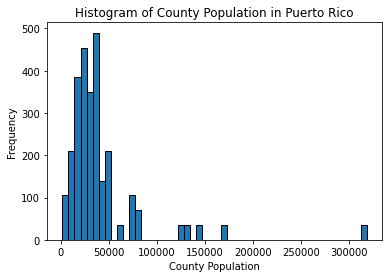

In [17]:
# Convert the 'date_updated' column to datetime
us_covid_df['date_updated'] = pd.to_datetime(us_covid_df['date_updated'])

# Create a new DataFrame with only the data for Puerto Rico
puerto_rico = us_covid_df[us_covid_df['state'] == 'Puerto Rico']

# Plot a histogram of the population of all the counties in Puerto Rico
plt.hist(puerto_rico['county_population'], bins=50, edgecolor='black')

# Add a title to the plot
plt.title("Histogram of County Population in Puerto Rico")

# Label the x-axis
plt.xlabel("County Population")

# Label the y-axis
plt.ylabel("Frequency")

# Display the plot
plt.show()

**Question 14** <br/>
During this time period how many counties had 'covid-19_community_level' labeled High? How many medium? How many low? 

In [18]:
# Convert the 'date_updated' column to datetime
us_covid_df['date_updated'] = pd.to_datetime(us_covid_df['date_updated'])

# Count the number of 'High' values
high = us_covid_df[us_covid_df['covid-19_community_level'] == 'High'].count()['covid-19_community_level']

# Count the number of 'Medium' values
medium = us_covid_df[us_covid_df['covid-19_community_level'] == 'Medium'].count()['covid-19_community_level']

# Count the number of 'Low' values
low = us_covid_df[us_covid_df['covid-19_community_level'] == 'Low'].count()['covid-19_community_level']

# Print the results
print("Number of counties with 'High':", high)
print("Number of counties with 'Medium':", medium)
print("Number of counties with 'Low':", low)

Number of counties with 'High': 16467
Number of counties with 'Medium': 28993
Number of counties with 'Low': 67250


**Question 15** <br/>
Using only code create a Pie chart to visualize your results from Question 14. Make sure to use proper labels (show either the counts or a %) and add a title. 
*Hint: The pandas plot methods will make this much easier.*

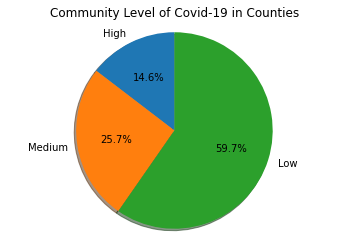

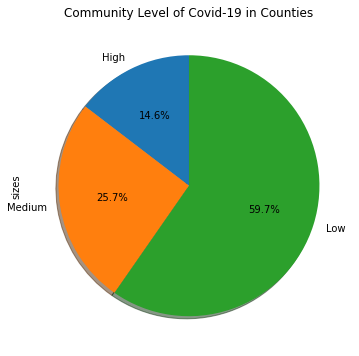

In [19]:
# Convert the 'date_updated' column to datetime
us_covid_df['date_updated'] = pd.to_datetime(us_covid_df['date_updated'])

# Count the number of 'High' values
high = us_covid_df[us_covid_df['covid-19_community_level'] == 'High'].count()['covid-19_community_level']

# Count the number of 'Medium' values
medium = us_covid_df[us_covid_df['covid-19_community_level'] == 'Medium'].count()['covid-19_community_level']

# Count the number of 'Low' values
low = us_covid_df[us_covid_df['covid-19_community_level'] == 'Low'].count()['covid-19_community_level']

# Using matplotlib to plot the data
labels = ['High', 'Medium', 'Low']
sizes = [high, medium, low]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title("Community Level of Covid-19 in Counties")
plt.show()
#############################

# Using Pandas to plot the data
df2 = pd.DataFrame({'labels': labels, 'sizes': sizes})
df2.plot.pie(y='sizes', labels=df2['labels'], autopct='%1.1f%%', shadow=True, startangle=90, legend=False, figsize=(6, 6))

plt.title("Community Level of Covid-19 in Counties")
plt.show()

**Question 16 (Graduate Students Only)** <br/>
Using only code, identify the 10 counties with the highest COVID Caes by 100k for October 20th, 2020. Again, only using code, visualize this information with a bar graph. Make sure to use appropriate lables and add a title to the graph. 